In [1]:
!pip install kaggle

In [2]:
!pip install torch torchvision ftfy regex tqdm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 1.2 MB/s eta 0:00:00


Importing **Splitting Filker face dataset**

In [3]:
!kaggle datasets download -d tommykamaz/faces-dataset-small

Dataset URL: https://www.kaggle.com/datasets/tommykamaz/faces-dataset-small
License(s): Attribution 4.0 International (CC BY 4.0)
100% 3.98G/3.99G [00:47<00:00, 120MB/s]
100% 3.99G/3.99G [00:47<00:00, 90.9MB/s]


In [4]:
import zipfile
import os

zip_file_path = '/content/faces-dataset-small.zip'
extract_path = '/content/real_face/'

os.makedirs(extract_path, exist_ok=True)

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Unzipping completed!")


Unzipping completed!


In [5]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

In [6]:
real_face_dataset = '/content/real_face/faces_dataset_small'

In [7]:
def show_samples(image_folder, num_samples=5):
    # Get a list of all images in the specified folder
    all_images = os.listdir(image_folder)

    # Randomly select a few images to display
    selected_images = random.sample(all_images, num_samples)

    # Plot the selected images
    plt.figure(figsize=(15, 6))
    for i, img_name in enumerate(selected_images):
        img_path = os.path.join(image_folder, img_name)
        img = mpimg.imread(img_path)

        plt.subplot(1, num_samples, i + 1)  # Create a subplot for each image
        plt.imshow(img)
        plt.axis('off')  # Hide the axes
        plt.title(img_name)  # Show the image name as title

    plt.tight_layout()
    plt.show()

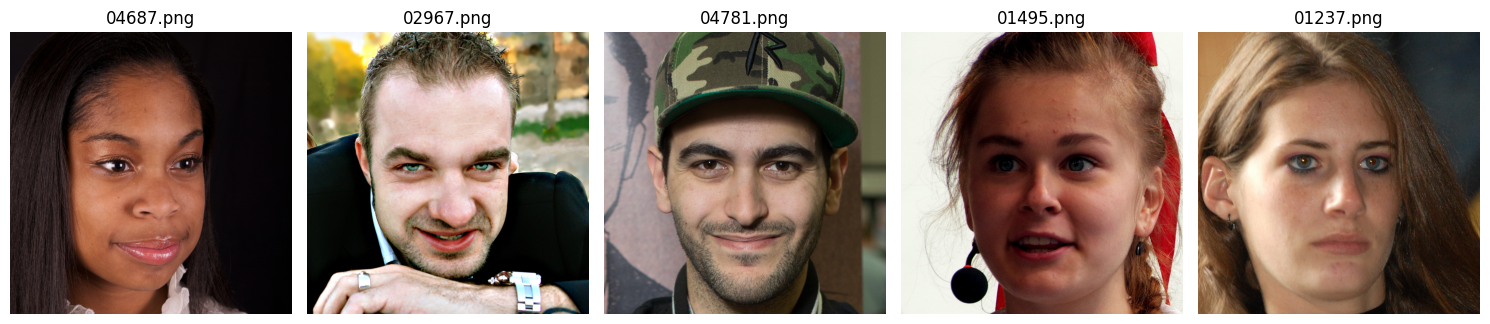

In [8]:
show_samples(real_face_dataset, num_samples=5)

Splitting Filker face dataset to train test datasets

In [9]:
import shutil
from sklearn.model_selection import train_test_split

In [10]:
real_face_dataset = '/content/real_face'
train_dir = '/content/real_face_dataset/train/'
test_dir = '/content/real_face_dataset/test/'

In [11]:
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

In [12]:
classes = os.listdir(real_face_dataset)

In [13]:
for class_name in classes:
    class_path = os.path.join(real_face_dataset, class_name)

    # Skip if it's not a directory (class folder)
    if not os.path.isdir(class_path):
        continue

    # Create corresponding train/test directories for this class
    os.makedirs(os.path.join(train_dir, class_name), exist_ok=True)
    os.makedirs(os.path.join(test_dir, class_name), exist_ok=True)

    # List all images in the class folder
    images = os.listdir(class_path)

    # Split the images into train (80%) and test (20%) sets
    train_images, test_images = train_test_split(images, test_size=0.2, random_state=42)

    # Move the images to their respective folders
    for img in train_images:
        shutil.move(os.path.join(class_path, img), os.path.join(train_dir, class_name, img))

    for img in test_images:
        shutil.move(os.path.join(class_path, img), os.path.join(test_dir, class_name, img))

print("Dataset has been split into training and testing sets!")

Dataset has been split into training and testing sets!


Loading The **Synthetic Faces High Quality** (SHFQ)

In [14]:
!pip install torchvision

In [15]:
!kaggle datasets download -d selfishgene/synthetic-faces-high-quality-sfhq-part-2


Dataset URL: https://www.kaggle.com/datasets/selfishgene/synthetic-faces-high-quality-sfhq-part-2
License(s): CC0-1.0
100% 13.5G/13.5G [03:09<00:00, 127MB/s]
100% 13.5G/13.5G [03:09<00:00, 76.4MB/s]


In [16]:
import zipfile
import os

zip_file_path = '/content/synthetic-faces-high-quality-sfhq-part-2.zip'
extract_path = '/content/synthetic_faces_dataset/'

os.makedirs(extract_path, exist_ok=True)

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Unzipping completed!")


Unzipping completed!


In [17]:
import os
import matplotlib.pyplot as plt
from PIL import Image
import torchvision.transforms as transforms

In [18]:
dataset_path = '/content/synthetic_faces_dataset/images/images'


In [19]:
def display_images(num_images=5):
    images = []
    image_files = os.listdir(dataset_path)

    # Load the specified number of images
    for i in range(min(num_images, len(image_files))):
        img_path = os.path.join(dataset_path, image_files[i])
        img = Image.open(img_path).convert("RGB")  # Open image and convert to RGB
        images.append(img)

    # Display the images
    plt.figure(figsize=(15, 5))
    for i, img in enumerate(images):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(img)
        plt.axis('off')
    plt.show()

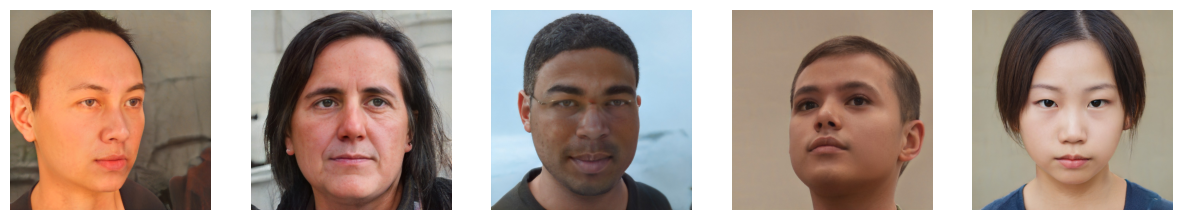

In [20]:
display_images(num_images=5)

Splitting into train test data set

In [21]:
dataset_dir = '/content/synthetic_faces_dataset/images/images'
train_dir = '/content/synthetic_faces_dataset/train/'
test_dir = '/content/synthetic_faces_dataset/test/'

In [22]:
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

In [23]:
image_extensions = ['.jpg', '.jpeg', '.png']

# List all image files in the dataset directory
images = [img for img in os.listdir(dataset_dir) if os.path.splitext(img)[1].lower() in image_extensions]



In [24]:
import random
from sklearn.model_selection import train_test_split
import shutil
import os

# Set a fixed random seed for reproducibility
random.seed(42)  # Any integer works, but using the same ensures the same selection each time

# Randomly select 3000 images from the total images
selected_images = random.sample(images, 3000)

# Split the selected images into training and testing sets
train_images, test_images = train_test_split(selected_images, test_size=0.2, random_state=42)

# Move the images to their respective train/test directories
for img in train_images:
    shutil.move(os.path.join(dataset_dir, img), os.path.join(train_dir, img))

for img in test_images:
    shutil.move(os.path.join(dataset_dir, img), os.path.join(test_dir, img))

print("Dataset has been split into training and testing sets for 3000 selected images!")



Dataset has been split into training and testing sets for 3000 selected images!


In [25]:
!rm -rf /content/real_face_dataset/train/.ipynb_checkpoints
!rm -rf /content/synthetic_faces_dataset/train/.ipynb_checkpoints


In [26]:
import os

# Define the paths to the datasets
real_train = '/content/real_face_dataset/train/faces_dataset_small'
synthetic_train = '/content/synthetic_faces_dataset/train'
real_test = '/content/real_face_dataset/test/faces_dataset_small'
synthetic_test = '/content/synthetic_faces_dataset/test'

# Function to count images in a directory
def count_images_in_directory(directory):
    return len([file for file in os.listdir(directory) if file.endswith(('.jpg', '.jpeg', '.png'))])

# Count images in each directory
num_real_train = count_images_in_directory(real_train)
num_synthetic_train = count_images_in_directory(synthetic_train)
num_real_test = count_images_in_directory(real_test)
num_synthetic_test = count_images_in_directory(synthetic_test)

print(f'Number of images in real faces train: {num_real_train}')
print(f'Number of images in synthetic faces train: {num_synthetic_train}')
print(f'Number of images in real faces test: {num_real_test}')
print(f'Number of images in synthetic faces test: {num_synthetic_test}')


Number of images in real faces train: 2514
Number of images in synthetic faces train: 2400
Number of images in real faces test: 629
Number of images in synthetic faces test: 600


In [27]:
!pip install git+https://github.com/openai/CLIP.git

  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-wy6_5y9_
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /tmp/pip-req-build-wy6_5y9_
  Resolved https://github.com/openai/CLIP.git to commit dcba3cb2e2827b402d2701e7e1c7d9fed8a20ef1
  Preparing metadata (setup.py) ... done
  Created wheel for clip: filename=clip-1.0-py3-none-any.whl size=1369489 sha256=1fda9d9a9e07cb77db1a0db96840647d296108d1ec6203804a43952695fcc935
  Stored in directory: /tmp/pip-ephem-wheel-cache-yunfty6o/wheels/da/2b/4c/d6691fa9597aac8bb85d2ac13b112deb897d5b50f5ad9a37e4
Successfully built clip


# **DENSENET 121**

In [ ]:
# Import libraries
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, ConcatDataset, random_split
from PIL import Image
import os
import clip
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Check device
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f'Using device: {device}')

# Load CLIP model for embedding generation
model_clip, preprocess = clip.load("ViT-B/32", device=device)

# Custom Dataset for real and synthetic images
class CustomImageDataset(Dataset):
    def __init__(self, directory, label):
        self.directory = directory
        self.label = label
        self.image_paths = [os.path.join(directory, fname) for fname in os.listdir(directory) if self.is_valid_image_file(fname)]

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        image = Image.open(img_path).convert('RGB')
        image = preprocess(image).unsqueeze(0).to(device)
        with torch.no_grad():
            image_embedding = model_clip.encode_image(image).squeeze().cpu()
        return image_embedding, self.label

    @staticmethod
    def is_valid_image_file(filename):
        valid_extensions = ['.jpg', '.jpeg', '.png']
        return any(filename.lower().endswith(ext) for ext in valid_extensions)

# Modify DenseNet to accept CLIP embeddings
class DenseNetWithEmbeddings(nn.Module):
    def __init__(self, embedding_dim=512, num_classes=1):
        super(DenseNetWithEmbeddings, self).__init__()
        # Load DenseNet and modify it to use embeddings
        self.densenet = torch.hub.load('pytorch/vision:v0.10.0', 'densenet121', pretrained=False)
        self.densenet.classifier = nn.Sequential(
            nn.Linear(embedding_dim, 256),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(256, num_classes),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.densenet.classifier(x)

# Paths to datasets (change to your dataset path)
real_images_dir = '/content/real_face_dataset/train/faces_dataset_small'  # Replace with actual path
synthetic_images_dir = '/content/synthetic_faces_dataset/train'  # Replace with actual path

# Create datasets
real_dataset = CustomImageDataset(real_images_dir, label=0)
synthetic_dataset = CustomImageDataset(synthetic_images_dir, label=1)

# Combine datasets using ConcatDataset
combined_dataset = ConcatDataset([real_dataset, synthetic_dataset])

# Fixed random split for training and validation
train_size = int(0.8 * len(combined_dataset))
val_size = len(combined_dataset) - train_size
train_dataset, val_dataset = random_split(combined_dataset, [train_size, val_size], generator=torch.Generator().manual_seed(42))

# DataLoaders
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

# Initialize Model, Loss, and Optimizer
model = DenseNetWithEmbeddings().to(device)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training Function
def train_model(model, train_loader, criterion, optimizer, num_epochs=10):
    model.train()
    for epoch in range(num_epochs):
        running_loss = 0.0
        all_labels = []
        all_preds = []

        for inputs, labels in train_loader:
            inputs = inputs.to(device).float()
            labels = labels.to(device).float().unsqueeze(1)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * inputs.size(0)
            preds = (outputs > 0.5).float()
            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(preds.cpu().numpy())

        epoch_loss = running_loss / len(train_loader.dataset)
        epoch_acc = accuracy_score(all_labels, all_preds)
        precision = precision_score(all_labels, all_preds)
        recall = recall_score(all_labels, all_preds)
        f1 = f1_score(all_labels, all_preds)

        print(f'Epoch {epoch}/{num_epochs}, Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.4f}, '
              f'Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}')

# Validation Function
def validate_model(model, val_loader, criterion):
    model.eval()
    val_loss = 0.0
    all_labels = []
    all_preds = []

    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs = inputs.to(device).float()
            labels = labels.to(device).float().unsqueeze(1)

            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item() * inputs.size(0)
            preds = (outputs > 0.5).float()
            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(preds.cpu().numpy())

    avg_val_loss = val_loss / len(val_loader.dataset)
    val_acc = accuracy_score(all_labels, all_preds)
    val_precision = precision_score(all_labels, all_preds)
    val_recall = recall_score(all_labels, all_preds)
    val_f1 = f1_score(all_labels, all_preds)
    roc_auc = roc_auc_score(all_labels, all_preds)

    print(f'Validation Loss: {avg_val_loss:.4f}, Accuracy: {val_acc:.4f}, Precision: {val_precision:.4f}, '
          f'Recall: {val_recall:.4f}, F1 Score: {val_f1:.4f}, ROC AUC: {roc_auc:.4f}')

    return avg_val_loss, val_acc, val_precision, val_recall, val_f1, roc_auc

# Train and Validate the Model
train_model(model, train_loader, criterion, optimizer, num_epochs=10)
validate_model(model, val_loader, criterion)

# Save the trained model
torch.save(model.state_dict(), 'densenet_clip_embeddings.pth')
print("Model training completed and saved!")



Using device: cuda


100%|███████████████████████████████████████| 338M/338M [00:04<00:00, 87.0MiB/s]
Downloading: "https://github.com/pytorch/vision/zipball/v0.10.0" to /root/.cache/torch/hub/v0.10.0.zip
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Epoch 0/10, Loss: 0.1629, Accuracy: 0.9466, Precision: 0.9504, Recall: 0.9395, F1 Score: 0.9449
Epoch 1/10, Loss: 0.0469, Accuracy: 0.9842, Precision: 0.9853, Recall: 0.9823, F1 Score: 0.9838
Epoch 2/10, Loss: 0.0360, Accuracy: 0.9873, Precision: 0.9875, Recall: 0.9864, F1 Score: 0.9869
Epoch 3/10, Loss: 0.0252, Accuracy: 0.9901, Precision: 0.9901, Recall: 0.9896, F1 Score: 0.9898
Epoch 4/10, Loss: 0.0236, Accuracy: 0.9906, Precision: 0.9901, Recall: 0.9906, F1 Score: 0.9903
Epoch 5/10, Loss: 0.0183, Accuracy: 0.9931, Precision: 0.9937, Recall: 0.9922, F1 Score: 0.9929
Epoch 6/10, Loss: 0.0129, Accuracy: 0.9959, Precision: 0.9963, Recall: 0.9953, F1 Score: 0.9958
Epoch 7/10, Loss: 0.0134, Accuracy: 0.9957, Precision: 0.9963, Recall: 0.9948, F1 Score: 0.9956
Epoch 8/10, Loss: 0.0076, Accuracy: 0.9982, Precision: 0.9974, Recall: 0.9990, F1 Score: 0.9982
Epoch 9/10, Loss: 0.0078, Accuracy: 0.9985, Precision: 0.9979, Recall: 0.9990, F1 Score: 0.9984
Validation Loss: 0.0175, Accuracy: 0.993

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet121_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet121_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/densenet121-a639ec97.pth" to /root/.cache/torch/hub/checkpoints/densenet121-a639ec97.pth
100%|██████████| 30.8M/30.8M [00:00<00:00, 156MB/s]
<ipython-input-31-af1df7f0e9f5>:69: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future releas

Test Accuracy: 51.10%
Test ROC AUC: 0.5386


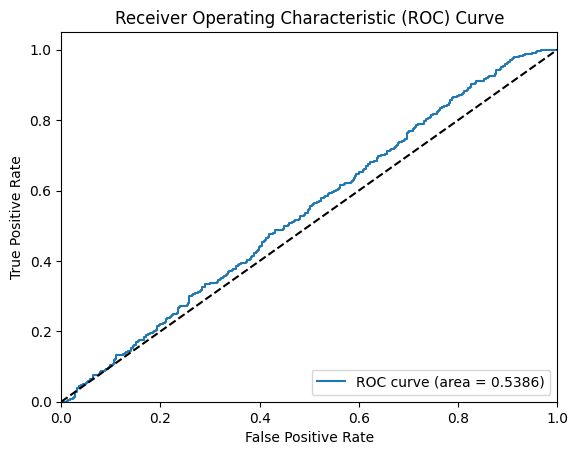

Optimal Threshold: 0.4113


In [ ]:
import os
import torch
from torchvision import transforms, models
from torch.utils.data import Dataset, DataLoader
from torch import nn
from PIL import Image
from sklearn.metrics import roc_auc_score, roc_curve
import numpy as np
import matplotlib.pyplot as plt

# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Data transformations (same as training)
data_transforms = transforms.Compose([
    transforms.Resize((224, 224)),   # Resize images to 224x224
    transforms.ToTensor(),            # Convert images to PyTorch tensors
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])  # Normalize based on ImageNet mean and std
])

# Custom dataset class for test data
class CustomImageDataset(Dataset):
    def __init__(self, directory, label):
        self.directory = directory
        self.label = label
        self.image_paths = [os.path.join(directory, fname) for fname in os.listdir(directory) if is_valid_image_file(fname)]

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        image = Image.open(img_path).convert('RGB')
        image = data_transforms(image)
        return image, self.label

def is_valid_image_file(filename):
    valid_extensions = ['.jpg', '.jpeg', '.png', '.ppm', '.bmp', '.pgm', '.tif', '.tiff', '.webp']
    return any(filename.lower().endswith(ext) for ext in valid_extensions)

# Paths to test datasets
real_face_test_dir = '/content/real_face_dataset/test/faces_dataset_small'
synthetic_face_test_dir = '/content/synthetic_faces_dataset/test'

# Create datasets for test data
real_test_dataset = CustomImageDataset(real_face_test_dir, label=0)  # Label 0 for real faces
synthetic_test_dataset = CustomImageDataset(synthetic_face_test_dir, label=1)  # Label 1 for synthetic faces

# Combine both test datasets
test_dataset = torch.utils.data.ConcatDataset([real_test_dataset, synthetic_test_dataset])

# DataLoader for testing
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Load the pre-trained DenseNet model
model = models.densenet121(pretrained=True)

# Modify the classifier for your custom task
num_ftrs = model.classifier.in_features
model.classifier = nn.Sequential(
    nn.Linear(num_ftrs, 512),
    nn.ReLU(),
    nn.Dropout(0.4),
    nn.Linear(512, 1),
    nn.Sigmoid()
)

# Load the custom-trained model weights (with strict=False to handle mismatches)
model.load_state_dict(torch.load('/content/densenet_clip_embeddings_1.pth'), strict=False)

# Move model to device (GPU/CPU)
model = model.to(device)
model.eval()  # Set the model to evaluation mode

# Evaluate the model and collect predictions and labels
all_labels = []
all_outputs = []

with torch.no_grad():  # Disable gradient calculation for evaluation
    for inputs, labels in test_loader:
        inputs = inputs.to(device)
        labels = labels.to(device).float().unsqueeze(1)  # Convert labels to float and reshape for BCE Loss

        # Forward pass
        outputs = model(inputs)

        # Collect predictions and labels for ROC AUC
        all_outputs.extend(outputs.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Calculate accuracy
preds = (torch.tensor(all_outputs) > 0.5).float()
accuracy = (preds.flatten() == torch.tensor(all_labels).flatten()).float().mean() * 100
print(f'Test Accuracy: {accuracy:.2f}%')

# Calculate ROC AUC
roc_auc = roc_auc_score(all_labels, all_outputs)
print(f'Test ROC AUC: {roc_auc:.4f}')

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(all_labels, all_outputs)
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Calculate the optimal threshold
distances = np.sqrt((fpr - 0) ** 2 + (tpr - 1) ** 2)
optimal_idx = np.argmin(distances)
optimal_threshold = thresholds[optimal_idx]

print(f'Optimal Threshold: {optimal_threshold:.4f}')


# **MobileNet V2**

In [28]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, ConcatDataset, random_split
from torchvision import transforms
from PIL import Image
import os
import clip
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from torchvision.models import mobilenet_v2, MobileNet_V2_Weights
from torch.optim.lr_scheduler import ReduceLROnPlateau

# Check device
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f'Using device: {device}')

# Load CLIP model for embedding generation
model_clip, preprocess = clip.load("ViT-B/32", device=device)

# Data augmentation
data_transforms = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.RandomRotation(10),  # Add rotation
    transforms.RandomAffine(degrees=0, translate=(0.1, 0.1)),  # Add affine
])

# Custom Dataset for real and synthetic images
class CustomImageDataset(Dataset):
    def __init__(self, directory, label):
        self.directory = directory
        self.label = label
        self.image_paths = [os.path.join(directory, fname) for fname in os.listdir(directory) if self.is_valid_image_file(fname)]
        self.transform = data_transforms

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        image = Image.open(img_path).convert('RGB')
        image = self.transform(image)  # Apply data augmentation
        image = preprocess(image).unsqueeze(0).to(device)
        with torch.no_grad():
            image_embedding = model_clip.encode_image(image).squeeze().cpu()
        return image_embedding, self.label

    @staticmethod
    def is_valid_image_file(filename):
        valid_extensions = ['.jpg', '.jpeg', '.png']
        return any(filename.lower().endswith(ext) for ext in valid_extensions)

# Modify MobileNetV2 to accept CLIP embeddings
class MobileNetWithEmbeddings(nn.Module):
    def __init__(self, embedding_dim=512, num_classes=1):
        super(MobileNetWithEmbeddings, self).__init__()
        self.mobilenet = mobilenet_v2(weights=MobileNet_V2_Weights.IMAGENET1K_V1)
        self.mobilenet.classifier = nn.Sequential(
            nn.Linear(embedding_dim, 128),
            nn.ReLU(),
            nn.Dropout(0.7),  # Increased dropout
            nn.Linear(128, num_classes),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.mobilenet.classifier(x)

# Paths to datasets (change to your dataset path)
real_images_dir = '/content/real_face_dataset/train/faces_dataset_small'  # Replace with actual path
synthetic_images_dir = '/content/synthetic_faces_dataset/train'  # Replace with actual path

# Create datasets
real_dataset = CustomImageDataset(real_images_dir, label=0)
synthetic_dataset = CustomImageDataset(synthetic_images_dir, label=1)

# Combine datasets using ConcatDataset
combined_dataset = ConcatDataset([real_dataset, synthetic_dataset])

# Fixed random split for training and validation
train_size = int(0.8 * len(combined_dataset))
val_size = len(combined_dataset) - train_size
train_dataset, val_dataset = random_split(combined_dataset, [train_size, val_size], generator=torch.Generator().manual_seed(42))

# DataLoaders
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

# Initialize Model, Loss, and Optimizer with weight decay for regularization
model = MobileNetWithEmbeddings().to(device)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4, weight_decay=1e-4)  # Increased weight decay

# Learning rate scheduler to reduce learning rate if validation loss stops improving
scheduler = ReduceLROnPlateau(optimizer, 'min', patience=3, factor=0.5)

# Early stopping parameters
early_stop_patience = 3
no_improvement_epochs = 0
best_val_loss = float('inf')

# Training and Validation Function
def train_model(model, train_loader, val_loader, criterion, optimizer, scheduler, num_epochs=10):
    global best_val_loss, no_improvement_epochs
    model.train()

    for epoch in range(num_epochs):
        running_loss = 0.0
        all_labels = []
        all_preds = []

        for inputs, labels in train_loader:
            inputs = inputs.to(device).float()
            labels = labels.to(device).float().unsqueeze(1)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * inputs.size(0)
            preds = (outputs > 0.5).float()
            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(preds.cpu().numpy())

        epoch_loss = running_loss / len(train_loader.dataset)
        epoch_acc = accuracy_score(all_labels, all_preds)
        precision = precision_score(all_labels, all_preds)
        recall = recall_score(all_labels, all_preds)
        f1 = f1_score(all_labels, all_preds)

        print(f'Epoch {epoch}/{num_epochs}, Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.4f}, '
              f'Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}')

        # Run validation after each epoch
        val_loss, val_acc, val_precision, val_recall, val_f1, roc_auc = validate_model(model, val_loader, criterion)

        # Step the scheduler with the validation loss
        scheduler.step(val_loss)

        # Early stopping
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            no_improvement_epochs = 0
            torch.save(model.state_dict(), 'best_model.pth')
        else:
            no_improvement_epochs += 1
            if no_improvement_epochs >= early_stop_patience:
                print("Early stopping due to no improvement in validation loss.")
                break

# Validation Function
def validate_model(model, val_loader, criterion):
    model.eval()
    val_loss = 0.0
    all_labels = []
    all_preds = []

    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs = inputs.to(device).float()
            labels = labels.to(device).float().unsqueeze(1)

            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item() * inputs.size(0)
            preds = (outputs > 0.5).float()
            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(preds.cpu().numpy())

    avg_val_loss = val_loss / len(val_loader.dataset)
    val_acc = accuracy_score(all_labels, all_preds)
    val_precision = precision_score(all_labels, all_preds)
    val_recall = recall_score(all_labels, all_preds)
    val_f1 = f1_score(all_labels, all_preds)
    roc_auc = roc_auc_score(all_labels, all_preds)

    print(f'Validation Loss: {avg_val_loss:.4f}, Accuracy: {val_acc:.4f}, Precision: {val_precision:.4f}, '
          f'Recall: {val_recall:.4f}, F1 Score: {val_f1:.4f}, ROC AUC: {roc_auc:.4f}')

    return avg_val_loss, val_acc, val_precision, val_recall, val_f1, roc_auc

# Train and Validate the Model
train_model(model, train_loader, val_loader, criterion, optimizer, scheduler, num_epochs=10)

print("Model training completed with early stopping applied.")


Using device: cuda


100%|████████████████████████████████████████| 338M/338M [00:02<00:00, 119MiB/s]
Downloading: "https://download.pytorch.org/models/mobilenet_v2-b0353104.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v2-b0353104.pth
100%|██████████| 13.6M/13.6M [00:00<00:00, 64.0MB/s]


Epoch 0/10, Loss: 0.6225, Accuracy: 0.6975, Precision: 0.6533, Recall: 0.8085, F1 Score: 0.7226
Validation Loss: 0.5392, Accuracy: 0.8444, Precision: 0.8621, Recall: 0.8140, F1 Score: 0.8374, ROC AUC: 0.8439
Epoch 1/10, Loss: 0.4633, Accuracy: 0.8596, Precision: 0.8597, Recall: 0.8507, F1 Score: 0.8552
Validation Loss: 0.3958, Accuracy: 0.8667, Precision: 0.8862, Recall: 0.8368, F1 Score: 0.8608, ROC AUC: 0.8663
Epoch 2/10, Loss: 0.3424, Accuracy: 0.8835, Precision: 0.8898, Recall: 0.8685, F1 Score: 0.8790
Validation Loss: 0.3141, Accuracy: 0.8810, Precision: 0.8946, Recall: 0.8595, F1 Score: 0.8767, ROC AUC: 0.8807
Epoch 3/10, Loss: 0.2878, Accuracy: 0.8985, Precision: 0.9032, Recall: 0.8867, F1 Score: 0.8949
Validation Loss: 0.2429, Accuracy: 0.9288, Precision: 0.9367, Recall: 0.9174, F1 Score: 0.9269, ROC AUC: 0.9286
Epoch 4/10, Loss: 0.2453, Accuracy: 0.9122, Precision: 0.9167, Recall: 0.9019, F1 Score: 0.9092
Validation Loss: 0.2306, Accuracy: 0.9105, Precision: 0.8929, Recall: 0.

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V2_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
<ipython-input-29-26a9de0624e1>:69: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for mo

Test Accuracy: 53.38%
Test ROC AUC: 0.4954


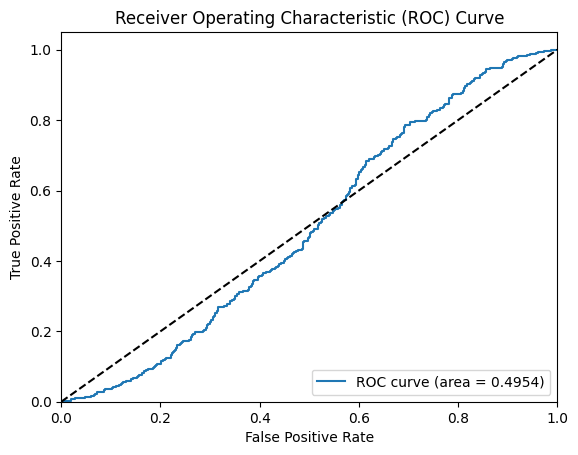

Optimal Threshold: 0.5038


In [29]:
import os
import torch
from torchvision import transforms, models
from torch.utils.data import Dataset, DataLoader
from torch import nn
from PIL import Image
from sklearn.metrics import roc_auc_score, roc_curve
import numpy as np
import matplotlib.pyplot as plt

# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Data transformations (same as training)
data_transforms = transforms.Compose([
    transforms.Resize((224, 224)),   # Resize images to 224x224
    transforms.ToTensor(),            # Convert images to PyTorch tensors
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])  # Normalize based on ImageNet mean and std
])

# Custom dataset class for test data
class CustomImageDataset(Dataset):
    def __init__(self, directory, label):
        self.directory = directory
        self.label = label
        self.image_paths = [os.path.join(directory, fname) for fname in os.listdir(directory) if is_valid_image_file(fname)]

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        image = Image.open(img_path).convert('RGB')
        image = data_transforms(image)
        return image, self.label

def is_valid_image_file(filename):
    valid_extensions = ['.jpg', '.jpeg', '.png', '.ppm', '.bmp', '.pgm', '.tif', '.tiff', '.webp']
    return any(filename.lower().endswith(ext) for ext in valid_extensions)

# Paths to test datasets
real_face_test_dir = '/content/real_face_dataset/test/faces_dataset_small'
synthetic_face_test_dir = '/content/synthetic_faces_dataset/test'

# Create datasets for test data
real_test_dataset = CustomImageDataset(real_face_test_dir, label=0)  # Label 0 for real faces
synthetic_test_dataset = CustomImageDataset(synthetic_face_test_dir, label=1)  # Label 1 for synthetic faces

# Combine both test datasets
test_dataset = torch.utils.data.ConcatDataset([real_test_dataset, synthetic_test_dataset])

# DataLoader for testing
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Load the MobileNetV2 model
model = models.mobilenet_v2(pretrained=True)

# Modify the classifier for binary classification
num_ftrs = model.classifier[1].in_features
model.classifier = nn.Sequential(
    nn.Linear(num_ftrs, 512),
    nn.ReLU(),
    nn.Dropout(0.4),
    nn.Linear(512, 1),
    nn.Sigmoid()
)

# Load the custom-trained model weights (with strict=False to handle mismatches)
model.load_state_dict(torch.load('/content/best_model.pth'), strict=False)

# Move model to device (GPU/CPU)
model = model.to(device)
model.eval()  # Set the model to evaluation mode

# Evaluate the model and collect predictions and labels
all_labels = []
all_outputs = []

with torch.no_grad():  # Disable gradient calculation for evaluation
    for inputs, labels in test_loader:
        inputs = inputs.to(device)
        labels = labels.to(device).float().unsqueeze(1)  # Convert labels to float and reshape for BCE Loss

        # Forward pass
        outputs = model(inputs)

        # Collect predictions and labels for ROC AUC
        all_outputs.extend(outputs.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Calculate accuracy
preds = (torch.tensor(all_outputs) > 0.5).float()
accuracy = (preds.flatten() == torch.tensor(all_labels).flatten()).float().mean() * 100
print(f'Test Accuracy: {accuracy:.2f}%')

# Calculate ROC AUC
roc_auc = roc_auc_score(all_labels, all_outputs)
print(f'Test ROC AUC: {roc_auc:.4f}')

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(all_labels, all_outputs)
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Calculate the optimal threshold
distances = np.sqrt((fpr - 0) ** 2 + (tpr - 1) ** 2)
optimal_idx = np.argmin(distances)
optimal_threshold = thresholds[optimal_idx]

print(f'Optimal Threshold: {optimal_threshold:.4f}')


# **VGG 16**

In [30]:
# Import libraries
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, ConcatDataset, random_split
from PIL import Image
import os
import clip
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Check device
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f'Using device: {device}')

# Load CLIP model for embedding generation
model_clip, preprocess = clip.load("ViT-B/32", device=device)

# Custom Dataset for real and synthetic images
class CustomImageDataset(Dataset):
    def __init__(self, directory, label):
        self.directory = directory
        self.label = label
        self.image_paths = [os.path.join(directory, fname) for fname in os.listdir(directory) if self.is_valid_image_file(fname)]

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        image = Image.open(img_path).convert('RGB')
        image = preprocess(image).unsqueeze(0).to(device)
        with torch.no_grad():
            image_embedding = model_clip.encode_image(image).squeeze().cpu()
        return image_embedding, self.label

    @staticmethod
    def is_valid_image_file(filename):
        valid_extensions = ['.jpg', '.jpeg', '.png']
        return any(filename.lower().endswith(ext) for ext in valid_extensions)

# Modify VGG to accept CLIP embeddings
class VGGWithEmbeddings(nn.Module):
    def __init__(self, embedding_dim=512, num_classes=1):
        super(VGGWithEmbeddings, self).__init__()
        # Load VGG and modify it to use embeddings
        self.vgg = torch.hub.load('pytorch/vision:v0.10.0', 'vgg16', pretrained=False)
        self.vgg.classifier = nn.Sequential(
            nn.Linear(embedding_dim, 256),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(256, num_classes),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.vgg.classifier(x)

# Paths to datasets (change to your dataset path)
real_images_dir = '/content/real_face_dataset/train/faces_dataset_small'  # Replace with actual path
synthetic_images_dir = '/content/synthetic_faces_dataset/train'  # Replace with actual path

# Create datasets
real_dataset = CustomImageDataset(real_images_dir, label=0)
synthetic_dataset = CustomImageDataset(synthetic_images_dir, label=1)

# Combine datasets using ConcatDataset
combined_dataset = ConcatDataset([real_dataset, synthetic_dataset])

# Fixed random split for training and validation
train_size = int(0.8 * len(combined_dataset))
val_size = len(combined_dataset) - train_size
train_dataset, val_dataset = random_split(combined_dataset, [train_size, val_size], generator=torch.Generator().manual_seed(42))

# DataLoaders
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

# Initialize Model, Loss, and Optimizer
model = VGGWithEmbeddings().to(device)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training Function
def train_model(model, train_loader, criterion, optimizer, num_epochs=10):
    model.train()
    for epoch in range(num_epochs):
        running_loss = 0.0
        all_labels = []
        all_preds = []

        for inputs, labels in train_loader:
            inputs = inputs.to(device).float()
            labels = labels.to(device).float().unsqueeze(1)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * inputs.size(0)
            preds = (outputs > 0.5).float()
            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(preds.cpu().numpy())

        epoch_loss = running_loss / len(train_loader.dataset)
        epoch_acc = accuracy_score(all_labels, all_preds)
        precision = precision_score(all_labels, all_preds)
        recall = recall_score(all_labels, all_preds)
        f1 = f1_score(all_labels, all_preds)

        print(f'Epoch {epoch}/{num_epochs}, Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.4f}, '
              f'Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}')

# Validation Function
def validate_model(model, val_loader, criterion):
    model.eval()
    val_loss = 0.0
    all_labels = []
    all_preds = []

    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs = inputs.to(device).float()
            labels = labels.to(device).float().unsqueeze(1)

            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item() * inputs.size(0)
            preds = (outputs > 0.5).float()
            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(preds.cpu().numpy())

    avg_val_loss = val_loss / len(val_loader.dataset)
    val_acc = accuracy_score(all_labels, all_preds)
    val_precision = precision_score(all_labels, all_preds)
    val_recall = recall_score(all_labels, all_preds)
    val_f1 = f1_score(all_labels, all_preds)
    roc_auc = roc_auc_score(all_labels, all_preds)

    print(f'Validation Loss: {avg_val_loss:.4f}, Accuracy: {val_acc:.4f}, Precision: {val_precision:.4f}, '
          f'Recall: {val_recall:.4f}, F1 Score: {val_f1:.4f}, ROC AUC: {roc_auc:.4f}')

    return avg_val_loss, val_acc, val_precision, val_recall, val_f1, roc_auc

# Train and Validate the Model
train_model(model, train_loader, criterion, optimizer, num_epochs=10)
validate_model(model, val_loader, criterion)

# Save the trained model
torch.save(model.state_dict(), 'vgg_clip_embeddings.pth')
print("Model training completed and saved!")


Using device: cuda


Downloading: "https://github.com/pytorch/vision/zipball/v0.10.0" to /root/.cache/torch/hub/v0.10.0.zip
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Epoch 0/10, Loss: 0.1633, Accuracy: 0.9479, Precision: 0.9534, Recall: 0.9389, F1 Score: 0.9461
Epoch 1/10, Loss: 0.0501, Accuracy: 0.9837, Precision: 0.9833, Recall: 0.9833, F1 Score: 0.9833
Epoch 2/10, Loss: 0.0314, Accuracy: 0.9888, Precision: 0.9890, Recall: 0.9880, F1 Score: 0.9885
Epoch 3/10, Loss: 0.0256, Accuracy: 0.9929, Precision: 0.9937, Recall: 0.9916, F1 Score: 0.9927
Epoch 4/10, Loss: 0.0201, Accuracy: 0.9949, Precision: 0.9963, Recall: 0.9932, F1 Score: 0.9948
Epoch 5/10, Loss: 0.0185, Accuracy: 0.9941, Precision: 0.9943, Recall: 0.9937, F1 Score: 0.9940
Epoch 6/10, Loss: 0.0151, Accuracy: 0.9947, Precision: 0.9943, Recall: 0.9948, F1 Score: 0.9945
Epoch 7/10, Loss: 0.0144, Accuracy: 0.9949, Precision: 0.9953, Recall: 0.9943, F1 Score: 0.9948
Epoch 8/10, Loss: 0.0107, Accuracy: 0.9967, Precision: 0.9974, Recall: 0.9958, F1 Score: 0.9966
Epoch 9/10, Loss: 0.0068, Accuracy: 0.9987, Precision: 0.9990, Recall: 0.9984, F1 Score: 0.9987
Validation Loss: 0.0188, Accuracy: 0.991

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet121_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet121_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/densenet121-a639ec97.pth" to /root/.cache/torch/hub/checkpoints/densenet121-a639ec97.pth
100%|██████████| 30.8M/30.8M [00:00<00:00, 63.2MB/s]
<ipython-input-31-b019879318e3>:69: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitl

Test Accuracy: 54.11%
Test ROC AUC: 0.5499


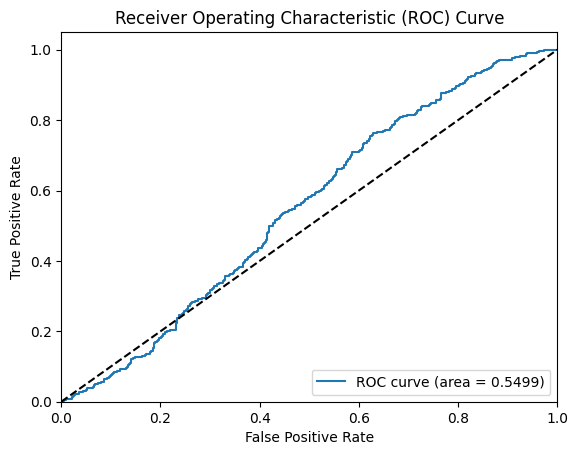

Optimal Threshold: 0.5252


In [31]:
import os
import torch
from torchvision import transforms, models
from torch.utils.data import Dataset, DataLoader
from torch import nn
from PIL import Image
from sklearn.metrics import roc_auc_score, roc_curve
import numpy as np
import matplotlib.pyplot as plt

# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Data transformations (same as training)
data_transforms = transforms.Compose([
    transforms.Resize((224, 224)),   # Resize images to 224x224
    transforms.ToTensor(),            # Convert images to PyTorch tensors
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])  # Normalize based on ImageNet mean and std
])

# Custom dataset class for test data
class CustomImageDataset(Dataset):
    def __init__(self, directory, label):
        self.directory = directory
        self.label = label
        self.image_paths = [os.path.join(directory, fname) for fname in os.listdir(directory) if is_valid_image_file(fname)]

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        image = Image.open(img_path).convert('RGB')
        image = data_transforms(image)
        return image, self.label

def is_valid_image_file(filename):
    valid_extensions = ['.jpg', '.jpeg', '.png', '.ppm', '.bmp', '.pgm', '.tif', '.tiff', '.webp']
    return any(filename.lower().endswith(ext) for ext in valid_extensions)

# Paths to test datasets
real_face_test_dir = '/content/real_face_dataset/test/faces_dataset_small'
synthetic_face_test_dir = '/content/synthetic_faces_dataset/test'

# Create datasets for test data
real_test_dataset = CustomImageDataset(real_face_test_dir, label=0)  # Label 0 for real faces
synthetic_test_dataset = CustomImageDataset(synthetic_face_test_dir, label=1)  # Label 1 for synthetic faces

# Combine both test datasets
test_dataset = torch.utils.data.ConcatDataset([real_test_dataset, synthetic_test_dataset])

# DataLoader for testing
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Load the pre-trained DenseNet model
model = models.densenet121(pretrained=True)

# Modify the classifier for your custom task
num_ftrs = model.classifier.in_features
model.classifier = nn.Sequential(
    nn.Linear(num_ftrs, 512),
    nn.ReLU(),
    nn.Dropout(0.4),
    nn.Linear(512, 1),
    nn.Sigmoid()
)

# Load the custom-trained model weights (with strict=False to handle mismatches)
model.load_state_dict(torch.load('/content/vgg_clip_embeddings.pth'), strict=False)

# Move model to device (GPU/CPU)
model = model.to(device)
model.eval()  # Set the model to evaluation mode

# Evaluate the model and collect predictions and labels
all_labels = []
all_outputs = []

with torch.no_grad():  # Disable gradient calculation for evaluation
    for inputs, labels in test_loader:
        inputs = inputs.to(device)
        labels = labels.to(device).float().unsqueeze(1)  # Convert labels to float and reshape for BCE Loss

        # Forward pass
        outputs = model(inputs)

        # Collect predictions and labels for ROC AUC
        all_outputs.extend(outputs.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Calculate accuracy
preds = (torch.tensor(all_outputs) > 0.5).float()
accuracy = (preds.flatten() == torch.tensor(all_labels).flatten()).float().mean() * 100
print(f'Test Accuracy: {accuracy:.2f}%')

# Calculate ROC AUC
roc_auc = roc_auc_score(all_labels, all_outputs)
print(f'Test ROC AUC: {roc_auc:.4f}')

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(all_labels, all_outputs)
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Calculate the optimal threshold
distances = np.sqrt((fpr - 0) ** 2 + (tpr - 1) ** 2)
optimal_idx = np.argmin(distances)
optimal_threshold = thresholds[optimal_idx]

print(f'Optimal Threshold: {optimal_threshold:.4f}')
